In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv(r"E:\Data Visualization\VNL2023.csv")

In [46]:
df.head(5)

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.60,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.00,OP
2,Abdel-Aziz Nimir,Nederland,31,15.33,0.67,2.08,0.00,3.17,0.25,OP
3,Herrera Jaime Jesus,Cuba,28,15.00,0.92,1.75,0.00,3.33,0.17,OP
4,Takahashi Ran,Japan,22,11.53,0.67,1.00,0.07,6.40,5.07,OH


In [48]:
df.shape

(131, 10)

In [50]:
df.describe()

,Age,Attack,Block,Serve,Set,Dig,Receive
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,27.809160,5.642672,0.845573,0.535802,2.192595,3.428397,1.684198
std,4.186268,4.256229,0.700896,0.454346,6.031587,2.077823,1.989939
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.530000,0.000000
25%,25.000000,2.800000,0.370000,0.240000,0.000000,1.920000,0.000000
50%,27.000000,5.170000,0.690000,0.420000,0.000000,3.000000,0.330000
75%,30.000000,8.600000,1.140000,0.760000,0.000000,4.510000,3.385000
max,41.000000,15.800000,4.080000,2.080000,26.890000,11.440000,6.690000


In [52]:
df.isna().sum()

Player      0
Country     0
Age         0
Attack      0
Block       0
Serve       0
Set         0
Dig         0
Receive     0
Position    0
dtype: int64

In [54]:
df.duplicated().sum()

0

In [56]:
numeric_cols= df.select_dtypes(include = ["int", "float"]).columns
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)

              Age    Attack     Block     Serve       Set       Dig   Receive
Age      1.000000 -0.177849 -0.101040 -0.108367  0.177757  0.167141 -0.011067
Attack  -0.177849  1.000000  0.338412  0.768859 -0.430805 -0.098999  0.169892
Block   -0.101040  0.338412  1.000000  0.335954 -0.132019 -0.348347 -0.265206
Serve   -0.108367  0.768859  0.335954  1.000000 -0.154815 -0.052501  0.039642
Set      0.177757 -0.430805 -0.132019 -0.154815  1.000000  0.131659 -0.305869
Dig      0.167141 -0.098999 -0.348347 -0.052501  0.131659  1.000000  0.624733
Receive -0.011067  0.169892 -0.265206  0.039642 -0.305869  0.624733  1.000000


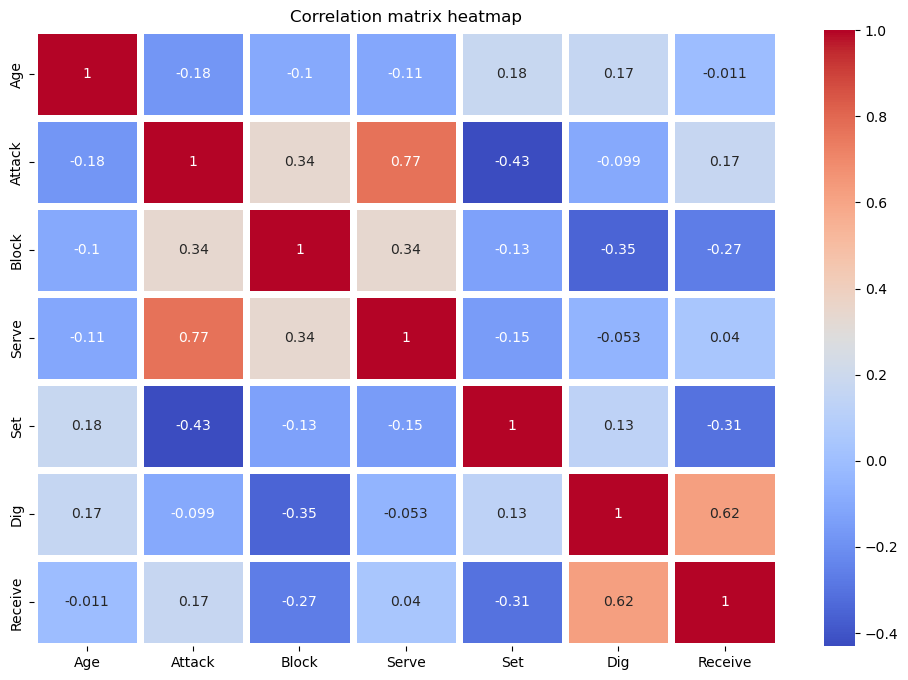

In [60]:
plt.figure(figsize=( 12 , 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidth=5)
plt.title("Correlation matrix heatmap")
plt.show()

In [86]:
position_counts = df["Position"].value_counts()
position_counts.index

Index(['OH', 'MB', 'OP', 'S', 'L'], dtype='object', name='Position')

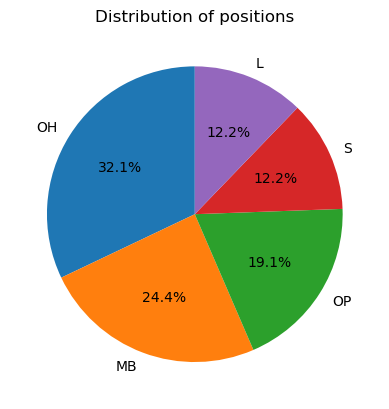

In [84]:
plt.pie(position_counts, labels=position_counts.index,autopct='%1.1f%%', startangle=90)
plt.title("Distribution of positions")
plt.show()

In [98]:
average_attack_by_country = df.groupby("Country")["Attack"].mean()
average_attack_by_country.sort_values(ascending = False).head(5)

Country
France    6.670000
Japan     6.595000
Cuba      6.344286
Serbia    5.998750
Italy     5.965000
Name: Attack, dtype: float64

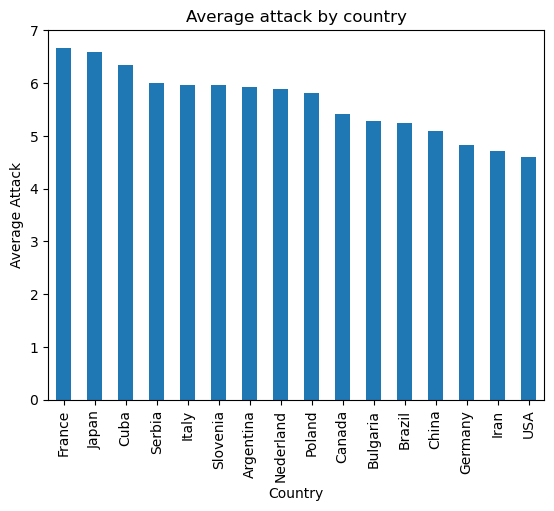

In [102]:
average_attack_by_country.sort_values(ascending = False).plot(kind = "bar")
plt.xlabel("Country")
plt.ylabel("Average Attack")
plt.title("Average attack by country")
plt.show()

In [104]:
df.head(2)

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.6,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.0,OP


In [114]:
average_serve_by_age = df.groupby("Age")["Serve"].mean()
average_serve_by_age.sort_values(ascending= False)

Age
31    0.910000
20    0.880000
21    0.770000
26    0.681053
28    0.667273
35    0.666667
27    0.662500
36    0.660000
24    0.640667
22    0.534286
23    0.526667
29    0.477500
30    0.429231
38    0.400000
33    0.321429
32    0.290000
37    0.270000
19    0.200000
25    0.165714
34    0.026667
41    0.000000
Name: Serve, dtype: float64

In [122]:
df.groupby(["Country","Position"])["Attack"].max().reset_index().sort_values(ascending=False,by = "Attack").head(30)

,Country,Position,Attack
52,Japan,OH,15.80
58,Nederland,OP,15.33
33,France,OP,15.25
28,Cuba,OP,15.00
68,Serbia,OP,14.33
12,Bulgaria,OH,14.25
22,China,OH,13.50
72,Slovenia,OH,12.62
8,Brazil,OP,12.46
48,Italy,OP,12.33


In [124]:
df.head(1)

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.8,1.13,1.4,0.07,4.8,5.6,OH


In [126]:
df.groupby("Country")["Dig"].sum()

Country
Argentina    33.88
Brazil       24.61
Bulgaria     22.45
Canada       26.50
China        22.08
Cuba         20.26
France       38.59
Germany      20.92
Iran         24.25
Italy        35.89
Japan        32.38
Nederland    21.84
Poland       32.56
Serbia       30.64
Slovenia     33.85
USA          28.42
Name: Dig, dtype: float64

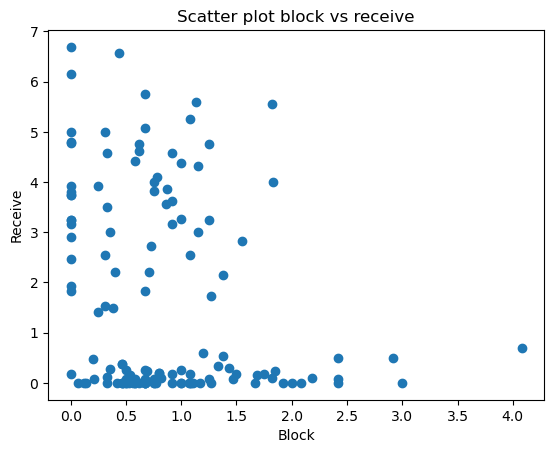

In [128]:
plt.scatter(df["Block"], df["Receive"])
plt.title("Scatter plot block vs receive")
plt.xlabel("Block")
plt.ylabel("Receive")
plt.show()

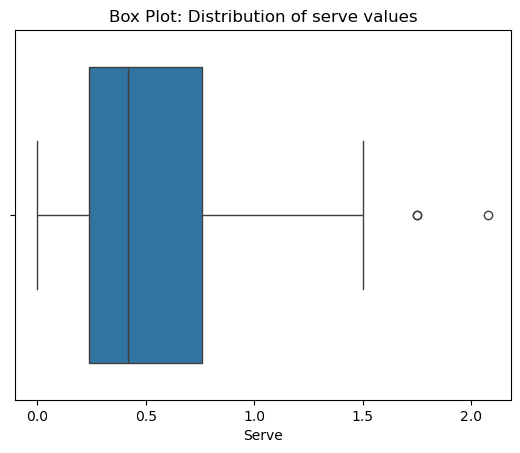

In [130]:
sns.boxplot(x= df["Serve"])
plt.title("Box Plot: Distribution of serve values")
plt.xlabel("Serve")
plt.show()

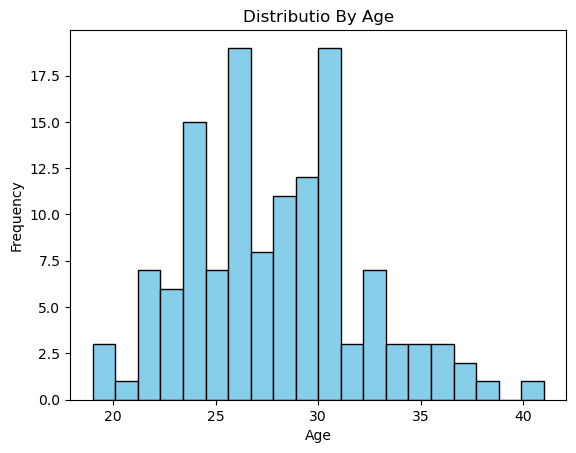

In [134]:
plt.hist(df["Age"], bins = 20, color = "skyblue", edgecolor = "black")
plt.title("Distributio By Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

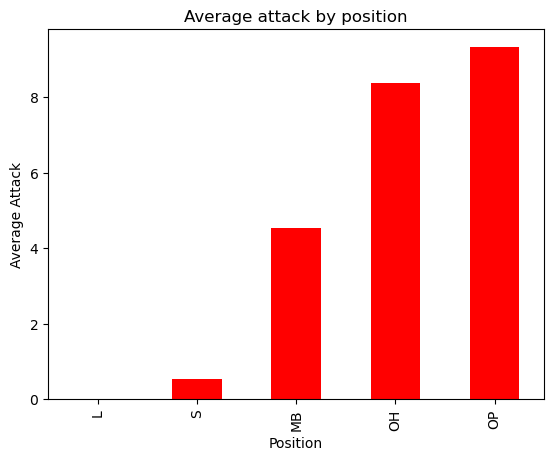

In [144]:
average_attack_by_position = df.groupby("Position")["Attack"].mean().sort_values(ascending = True)
average_attack_by_position.plot(kind = "bar", color = "red")
plt.title("Average attack by position")
plt.xlabel("Position")
plt.ylabel("Average Attack")
plt.show()

Text(0, 0.5, 'Average Serve')

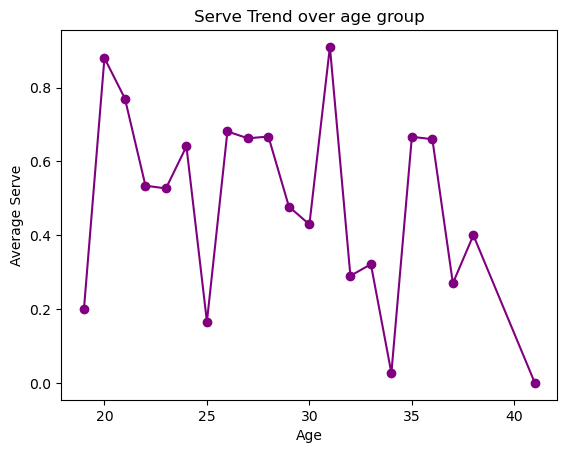

In [150]:
serve_trend_by_age = df.groupby("Age")["Serve"].mean()

serve_trend_by_age.plot(kind = "line", marker = "o", color = "purple", linestyle = "-")
plt.title("Serve Trend over age group")
plt.xlabel("Age")
plt.ylabel("Average Serve")

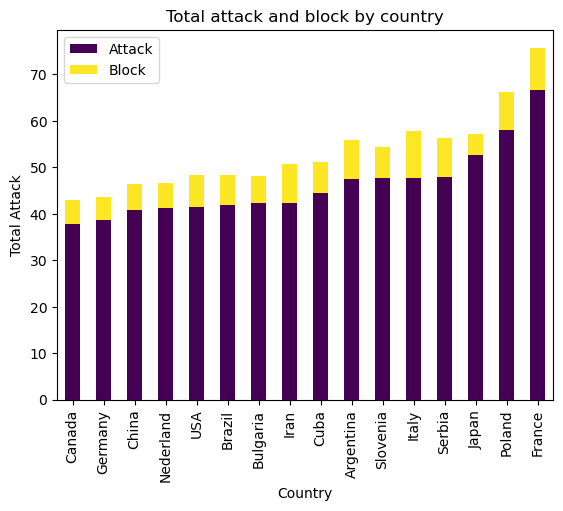

In [164]:
total_attack_by_country = df.groupby("Country")[["Attack", "Block"]].sum().sort_values(ascending = True, by = "Attack")

total_attack_by_country.plot(kind = "bar", stacked = True, colormap = "viridis")
plt.title("Total attack and block by country")
plt.xlabel("Country")
plt.ylabel("Total Attack")
plt.show()
